In [123]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

In [185]:
# read pickle file
with open('./results/lasso_results_EUR.pkl', 'rb') as f:
    eur_lasso = pickle.load(f)

# extract key and r2_test from the dictionary as dataframe
key = list(eur_lasso.keys())
r2_test = [eur_lasso[k]['r2_test'] for k in key]

eur_lasso = pd.DataFrame({'gene': key, 'r2_test': r2_test})


# read pickle file
with open('./results/ridge_results_EUR.pkl', 'rb') as f:
    eur_ridge = pickle.load(f)

# extract key and r2_test from the dictionary as dataframe
key = list(eur_ridge.keys())
r2_test = [eur_ridge[k]['r2_test'] for k in key]

eur_ridge = pd.DataFrame({'gene': key, 'r2_test': r2_test})



# read pickle file
with open('./results/elasticnet_results_EUR.pkl', 'rb') as f:
    eur_elasticnet = pickle.load(f)

# extract key and r2_test from the dictionary as dataframe
key = list(eur_elasticnet.keys())
r2_test = [eur_elasticnet[k]['r2_test'] for k in key]

eur_elastic = pd.DataFrame({'gene': key, 'r2_test': r2_test})



# read pickle file
with open('./results/marginal_results_EUR.pkl', 'rb') as f:
    eur_marginal = pickle.load(f)

# extract key and r2_test from the dictionary as dataframe
key = list(eur_marginal[0].keys())
r2_test = [eur_marginal[0][k]['r2_test'] for k in key]

eur_marginal = pd.DataFrame({'gene': key, 'r2_test': r2_test})

/Users/ziqixu/anaconda3/lib/python3.11/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator Lasso from version 1.4.1.post1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/ziqixu/anaconda3/lib/python3.11/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator Ridge from version 1.4.1.post1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/ziqixu/anaconda3/lib/python3.11/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ElasticNet from version 1.4.1.post1 when using version 1.2.2. This might lead to breaking code or invalid re

In [186]:
# read pickle file
with open('./results/lasso_results_YRI.pkl', 'rb') as f:
    yri_lasso = pickle.load(f)

# extract key and r2_test from the dictionary as dataframe
key = list(yri_lasso.keys())
r2_test = [yri_lasso[k]['r2_test'] for k in key]

yri_lasso = pd.DataFrame({'gene': key, 'r2_test': r2_test})


# read pickle file
with open('./results/ridge_results_YRI.pkl', 'rb') as f:
    yri_ridge = pickle.load(f)

# extract key and r2_test from the dictionary as dataframe
key = list(yri_ridge.keys())
r2_test = [yri_ridge[k]['r2_test'] for k in key]

yri_ridge = pd.DataFrame({'gene': key, 'r2_test': r2_test})



# read pickle file
with open('./results/elasticnet_results_YRI.pkl', 'rb') as f:
    yri_elasticnet = pickle.load(f)

# extract key and r2_test from the dictionary as dataframe
key = list(yri_elasticnet.keys())
r2_test = [yri_elasticnet[k]['r2_test'] for k in key]

yri_elastic = pd.DataFrame({'gene': key, 'r2_test': r2_test})


# read pickle file
with open('./results/marginal_results_YRI.pkl', 'rb') as f:
    yri_marginal = pickle.load(f)

# extract key and r2_test from the dictionary as dataframe
key = list(yri_marginal[0].keys())
r2_test = [yri_marginal[0][k]['r2_test'] for k in key]

yri_marginal = pd.DataFrame({'gene': key, 'r2_test': r2_test})

/Users/ziqixu/anaconda3/lib/python3.11/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator Lasso from version 1.4.1.post1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/ziqixu/anaconda3/lib/python3.11/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator Ridge from version 1.4.1.post1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/ziqixu/anaconda3/lib/python3.11/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ElasticNet from version 1.4.1.post1 when using version 1.2.2. This might lead to breaking code or invalid re

In [145]:
df_eur_h2 = pd.read_csv('GEUVADIS_EUR_h2.txt', sep='\t')
df_eur_h2['gene'] = df_eur_h2['gene'].str.split('.').str[0]

df_yri_h2 = pd.read_csv('GEUVADIS_YRI_h2.txt', sep='\t')
df_yri_h2['gene'] = df_yri_h2['gene'].str.split('.').str[0]

In [187]:
# merge all models together
eur_res = eur_lasso.merge(eur_ridge, on='gene', suffixes=('_lasso_eur', '_ridge_eur'))
eur_res = eur_res.merge(eur_elastic, on='gene')
eur_res = eur_res.rename(columns={'r2_test': 'r2_test_elastic_eur'})
eur_res = eur_res.merge(eur_marginal, on='gene')
eur_res = eur_res.rename(columns={'r2_test': 'r2_test_marginal_eur'})

yri_res = yri_lasso.merge(yri_ridge, on='gene', suffixes=('_lasso_yri', '_ridge_yri'))
yri_res = yri_res.merge(yri_elastic, on='gene')
yri_res = yri_res.rename(columns={'r2_test': 'r2_test_elastic_yri'})
yri_res = yri_res.merge(yri_marginal, on='gene')
yri_res = yri_res.rename(columns={'r2_test': 'r2_test_marginal_yri'})

In [188]:
# divide the r2_test by h2
eur_res = eur_res.merge(df_eur_h2, on='gene')
eur_res = eur_res.rename(columns={'hsq': 'h2'})
# remove rows with NaN
eur_res = eur_res.dropna()

# remove rows with absolute h2 < 0.003
eur_res = eur_res[np.abs(eur_res['h2']) > 0.003]

eur_res['lasso_acc_eur'] = eur_res['r2_test_lasso_eur'] / eur_res['h2']
eur_res['ridge_acc_eur'] = eur_res['r2_test_ridge_eur'] / eur_res['h2']
eur_res['elastic_acc_eur'] = eur_res['r2_test_elastic_eur'] / eur_res['h2']
eur_res['marginal_acc_eur'] = eur_res['r2_test_marginal_eur'] / eur_res['h2']

# use the same h2 for YRI because YRI sample size is too small
yri_res = yri_res.merge(df_yri_h2, on='gene')
yri_res = yri_res.rename(columns={'hsq': 'h2'})
# remove rows with NaN
yri_res = yri_res.dropna()
# remove rows with absolute h2 < 0.003
yri_res = yri_res[np.abs(yri_res['h2']) > 0.003]

yri_res['lasso_acc_yri'] = yri_res['r2_test_lasso_yri'] / yri_res['h2']
yri_res['ridge_acc_yri'] = yri_res['r2_test_ridge_yri'] / yri_res['h2']
yri_res['elastic_acc_yri'] = yri_res['r2_test_elastic_yri'] / yri_res['h2']
yri_res['marginal_acc_yri'] = yri_res['r2_test_marginal_yri'] / yri_res['h2']


In [190]:
eur_res

,gene,r2_test_lasso_eur,r2_test_ridge_eur,r2_test_elastic_eur,r2_test_marginal_eur,h2,lasso_acc_eur,ridge_acc_eur,elastic_acc_eur,marginal_acc_eur
1,ENSG00000188976,-0.027443,-0.791338,-0.055281,-6.100729,-0.009785,2.804635,80.872588,5.649531,623.477672
2,ENSG00000187961,-0.036631,-0.405645,-0.030080,-10.611651,0.036992,-0.990249,-10.965755,-0.813161,-286.863406
3,ENSG00000187583,-0.003117,-1.315925,-0.012856,-3.977530,0.034586,-0.090123,-38.047920,-0.371716,-115.004051
4,ENSG00000187642,-0.022964,-1.046577,-0.083830,-9.671688,-0.016465,1.394707,63.563758,5.091398,587.408950
5,ENSG00000188290,0.005144,-0.510523,-0.023786,-13.512719,0.063545,0.080954,-8.034037,-0.374310,-212.648029
...,...,...,...,...,...,...,...,...,...,...
13908,ENSG00000148399,-0.033674,-0.687710,-0.025705,-7.809723,-0.019199,1.753957,35.820081,1.338864,406.777591
13909,ENSG00000165724,-0.001548,-3.040734,-0.065172,-9.072595,0.038712,-0.039979,-78.547575,-1.683513,-234.361299
13910,ENSG00000197070,-0.036415,-3.546524,-0.162863,-12.543108,0.031954,-1.139609,-110.988408,-5.096810,-392.536407
13911,ENSG00000181090,-0.086820,-2.156859,-0.193435,-9.669527,0.017560,-4.944175,-122.827935,-11.015682,-550.656445


In [189]:
eur_res[eur_res['r2_test_marginal_eur']>0]

,gene,r2_test_lasso_eur,r2_test_ridge_eur,r2_test_elastic_eur,r2_test_marginal_eur,h2,lasso_acc_eur,ridge_acc_eur,elastic_acc_eur,marginal_acc_eur


In [152]:
lasso_acc_avg_eur = eur_res[eur_res['r2_test_lasso_eur']>0]['lasso_acc_eur'].mean()
ridge_acc_avg_eur = eur_res[eur_res['r2_test_ridge_eur']>0]['ridge_acc_eur'].mean()
elastic_acc_avg_eur = eur_res[eur_res['r2_test_elastic_eur']>0]['elastic_acc_eur'].mean()
marginal_acc_avg_eur = eur_res[eur_res['r2_test_marginal_eur']>0]['marginal_acc_eur'].mean()

lasso_acc_avg_yri = yri_res[yri_res['r2_test_lasso_yri']>0]['lasso_acc_yri'].mean()
ridge_acc_avg_yri = yri_res[yri_res['r2_test_ridge_yri']>0]['ridge_acc_yri'].mean()
elastic_acc_avg_yri = yri_res[yri_res['r2_test_elastic_yri']>0]['elastic_acc_yri'].mean()
marginal_acc_avg_yri = yri_res[yri_res['r2_test_marginal_yri']>0]['marginal_acc_yri'].mean()

In [180]:
eur_res

,gene,r2_test_lasso_eur,r2_test_ridge_eur,r2_test_elastic_eur,r2_test_marginal_eur,h2,lasso_acc_eur,ridge_acc_eur,elastic_acc_eur,marginal_acc_eur
1,ENSG00000188976,-0.027443,-0.791338,-0.055281,-6.100729,-0.009785,2.804635,80.872588,5.649531,623.477672
2,ENSG00000187961,-0.036631,-0.405645,-0.030080,-5.887601,0.036992,-0.990249,-10.965755,-0.813161,-159.158762
3,ENSG00000187583,-0.003117,-1.315925,-0.012856,-2.046495,0.034586,-0.090123,-38.047920,-0.371716,-59.171189
4,ENSG00000187642,-0.022964,-1.046577,-0.083830,-3.312327,-0.016465,1.394707,63.563758,5.091398,201.173827
5,ENSG00000188290,0.005144,-0.510523,-0.023786,-13.512719,0.063545,0.080954,-8.034037,-0.374310,-212.648029
...,...,...,...,...,...,...,...,...,...,...
13908,ENSG00000148399,-0.033674,-0.687710,-0.025705,-3.314466,-0.019199,1.753957,35.820081,1.338864,172.637413
13909,ENSG00000165724,-0.001548,-3.040734,-0.065172,-9.072595,0.038712,-0.039979,-78.547575,-1.683513,-234.361299
13910,ENSG00000197070,-0.036415,-3.546524,-0.162863,-8.730238,0.031954,-1.139609,-110.988408,-5.096810,-273.212688
13911,ENSG00000181090,-0.086820,-2.156859,-0.193435,-5.695573,0.017560,-4.944175,-122.827935,-11.015682,-324.349273


In [177]:
eur_res[eur_res['r2_test_marginal_eur']>0]

,gene,r2_test_lasso_eur,r2_test_ridge_eur,r2_test_elastic_eur,r2_test_marginal_eur,h2,lasso_acc_eur,ridge_acc_eur,elastic_acc_eur,marginal_acc_eur


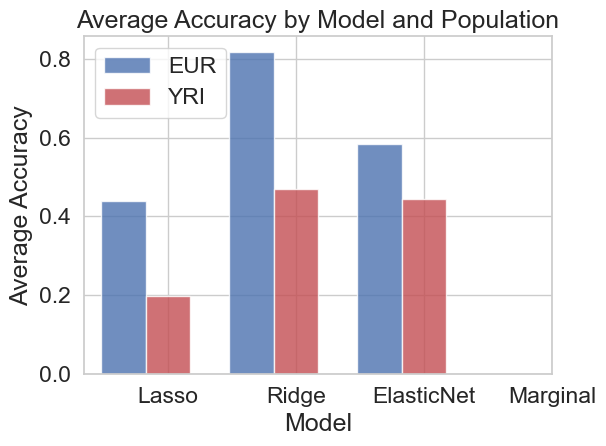

In [156]:
# plot a barplot with each bar as the average accuracy of each poopulation, grouped by model
fig, ax = plt.subplots()
index = np.arange(4)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, [lasso_acc_avg_eur, ridge_acc_avg_eur, elastic_acc_avg_eur, marginal_acc_avg_eur], bar_width, alpha=opacity, color='b', label='EUR')
rects2 = plt.bar(index + bar_width, [lasso_acc_avg_yri, ridge_acc_avg_yri, elastic_acc_avg_yri, marginal_acc_avg_yri], bar_width, alpha=opacity, color='r', label='YRI')

plt.xlabel('Model')
plt.ylabel('Average Accuracy')
plt.title('Average Accuracy by Model and Population')
plt.xticks(index + bar_width, ('Lasso', 'Ridge', 'ElasticNet', 'Marginal'))
plt.legend()

plt.tight_layout()
plt.show()

<Figure size 2000x1200 with 0 Axes>

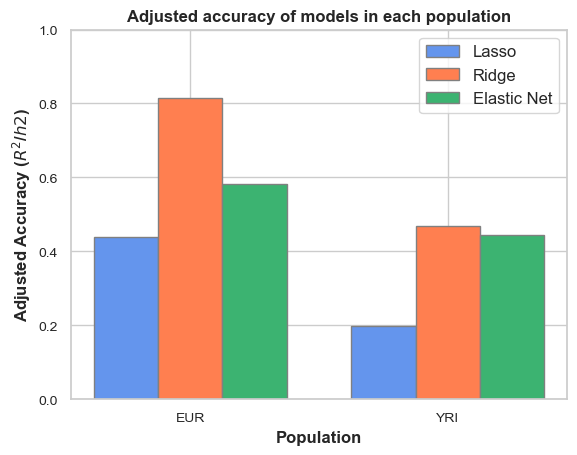

In [191]:
# plot a barplot with each bar as the average accuracy for each population, grouped by model
# make the figure larger
plt.figure(figsize=(20, 12))
# make the grid size smaller
sns.set(font_scale=1.5)
sns.set_style("whitegrid")

fig, ax = plt.subplots()
barWidth = 0.25
bars1 = [lasso_acc_avg_eur, lasso_acc_avg_yri]
bars2 = [ridge_acc_avg_eur, ridge_acc_avg_yri]
bars3 = [elastic_acc_avg_eur, elastic_acc_avg_yri]
#bars4 = [marginal_acc_avg_eur, marginal_acc_avg_yri]
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
#r4 = [x + barWidth for x in r3]


plt.bar(r1, bars1, color='cornflowerblue', width=barWidth, edgecolor='grey', label='Lasso')
plt.bar(r2, bars2, color='coral', width=barWidth, edgecolor='grey', label='Ridge')
plt.bar(r3, bars3, color='mediumseagreen', width=barWidth, edgecolor='grey', label='Elastic Net')
#plt.bar(r4, bars4, color='goldenrod', width=barWidth, edgecolor='grey', label='Marginal')


plt.ylim(0, 1)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Population', fontweight='bold', fontsize=12)
plt.xticks([r + barWidth for r in range(len(bars1))], ['EUR', 'YRI'])

plt.ylabel('Adjusted Accuracy ($R^2$/$h2$)', fontweight='bold', fontsize=12)
plt.title('Adjusted accuracy of models in each population', fontweight='bold', fontsize=12)
plt.legend(fontsize=12)
plt.show()

In [192]:
fig.savefig('adjusted_acc.png', dpi=300)